# Install PostgreSQL

In [1]:
!brew info postgresql

postgresql: stable 9.6.3 (bottled), HEAD
Object-relational database system
https://www.postgresql.org/
Conflicts with: postgres-xc
Not installed
From: https://github.com/Homebrew/homebrew-core/blob/master/Formula/postgresql.rb
==> Dependencies
Required: openssl ✔, readline ✔
==> Requirements
Optional: python ✔, python3 ✔
==> Options
--with-dtrace
	Build with DTrace support
--with-python
	Enable PL/Python2
--with-python3
	Enable PL/Python3 (incompatible with --with-python)
--without-perl
	Build without Perl support
--without-tcl
	Build without Tcl support
--HEAD
	Install HEAD version
==> Caveats
If builds of PostgreSQL 9 are failing and you have version 8.x installed,
you may need to remove the previous version first. See:
  https://github.com/Homebrew/legacy-homebrew/issues/2510

To migrate existing data from a previous major version (pre-9.0) of PostgreSQL, see:
  https://www.postgresql.org/docs/9.6/static/upgrading.html

To migrate existing data from a previous minor version (9.0-9.5

In [2]:
!brew install postgresql --with-python3

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (caskroom/cask, homebrew/core).
==> New Formulae
angular-cli     cython          mariadb@10.1    twine-pypi      zeromq@4.1
==> Updated Formulae
algernon                   gnome-builder              p11-kit
ammonite-repl              gnutls                     paket
antigen                    go                         pango
apache-archiva             go@1.7                     par2
arangodb                   godep                      parallel
artifactory                goofys                     pcsc-lite
awf                        grafana                    pdf2htmlex
aws-sdk-cpp                grc                        pdftoedn
awscli                     gtksourceview3             pgplot
bandcamp-dl                heroku                     planck
bmon                       highlight                  pmd
caddy                      hugo                       poppler
calc                       hyper                      

In [5]:
!pip3 install psycopg2

    100% |████████████████████████████████| 1.5MB 750kB/s ta 0:00:01


In [8]:
!brew services start postgresql

==> Successfully started `postgresql` (label: homebrew.mxcl.postgresql)


In [94]:
!brew services stop postgresql

Stopping `postgresql`... (might take a while)
==> Successfully stopped `postgresql` (label: homebrew.mxcl.postgresql)


# Load data into PostgreSQL
- setup: https://www.codementor.io/devops/tutorial/getting-started-postgresql-server-mac-osx
- drop template DB: https://stackoverflow.com/questions/11388786/how-does-one-drop-a-template-database-from-postgresql
- load csv directly: https://stackoverflow.com/questions/2987433/how-to-import-csv-file-data-into-a-postgresql-table

In [1]:
%matplotlib inline
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# connect to local PostgreSQL
engine = create_engine('postgresql://lei@localhost/zillow')

# read SQL result
def get_sql(sql):
    return pd.read_sql(sql, engine)

In [3]:
for chunk in pd.read_csv('properties_2016.csv', chunksize=88888):
    chunk.to_sql('properties', engine, if_exists='append')
    
# note: another way to load data: use pandas to define table, then postgresql cmd line to read csv directly

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Check samples

In [4]:
sub = pd.read_csv('sample_submission.csv')
sub.shape

(2985217, 7)

In [5]:
sample = pd.read_csv('properties_2016.csv', nrows=88)
sample.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


In [33]:
sample.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                              int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                          int64


In [85]:
pd.read_excel('zillow_data_dictionary.xlsx', sheetname='Data Dictionary')

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


# Query PostgreSQL

In [19]:
train = pd.read_csv('train_2016.csv', parse_dates=['transactiondate'])
train.shape

(90811, 3)

In [60]:
# pd.read_sql('select count(*), regionidcity from properties group by regionidcity', engine)
# pd.read_sql('select * from properties where parcelid=12643413', engine)
# train['ratio'] = np.exp(train.logerror)


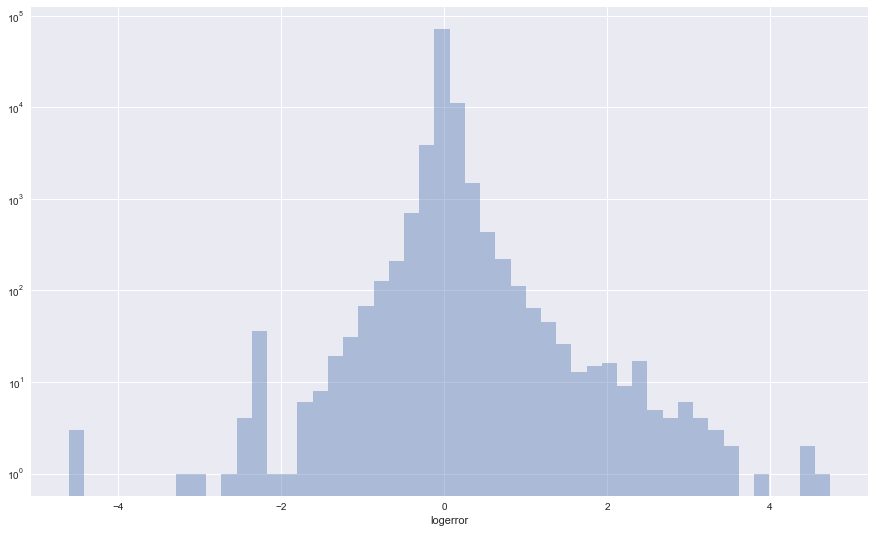

In [57]:
# train.ratio.sort_values(ascending=False)

# plt.figure(figsize=(15,9))
fig,ax = plt.subplots(figsize=(15,9))

sns.distplot(train.logerror, kde=False)
ax.set_yscale('log')

In [58]:
train.to_sql('train', engine, if_exists='replace')

In [67]:
df = get_sql('select p.* from properties p join train t on p.parcelid=t.parcelid where logerror=0')
df.shape

(848, 59)

In [86]:
df = get_sql('select buildingqualitytypeid, logerror from properties p, train t where p.parcelid=t.parcelid')
df.shape

(90811, 2)

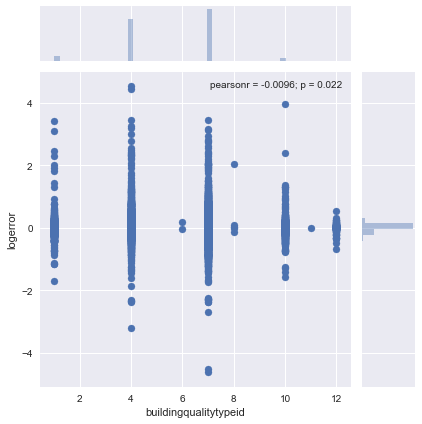

In [87]:
sns.jointplot(x='buildingqualitytypeid', y='logerror', data=df)

In [91]:
get_sql('select count(*) from properties p, train t where p.parcelid=t.parcelid and yearbuilt is null')

,count
0,1292


In [138]:
get_sql("select string_agg(distinct airconditioningtypeid::text,','), yearbuilt from properties group by yearbuilt having count(distinct airconditioningtypeid)=3")

,string_agg,yearbuilt
0,"1,13,5",1902.0
1,"1,13,5",1903.0
2,"1,13,5",1904.0
3,"1,13,5",1905.0
4,"1,13,5",1909.0
5,"1,13,5",1910.0
6,"1,13,5",1912.0
7,"1,13,5",1914.0
8,"1,13,5",1917.0
9,"1,13,5",1919.0


# SQL practice

In [3]:
def get_sql(sql):
    return pd.read_sql(sql, engine)

In [47]:
sql = 'select a.contest_id, a.hacker_id, a.name, sum(b.ts), sum(b.tas), sum(b.tv), sum(b.tuv) from \
    (select ct.*, ch.challenge_id from contests ct join colleges cl on ct.contest_id=cl.contest_id join challenges ch on ch.college_id=cl.college_id order by ct.contest_id) a \
    join (select ss.*, vs.tv, vs.tuv from (select sum(total_submissions) as ts, sum(total_accepted_submissions) as tas, challenge_id from submission_stats group by challenge_id) ss join (select sum(total_views) as tv, sum(total_unique_views) as tuv, challenge_id from view_stats group by challenge_id) vs on ss.challenge_id=vs.challenge_id) b on a.challenge_id=b.challenge_id group by contest_id, hacker_id, name order by contest_id;'

sql = 'select ct.*, coalesce(sum(ts),0) as s1, coalesce(sum(tas),0) as s2, coalesce(sum(tv),0), coalesce(sum(tuv),0), coalesce(sum(ts)+sum(tas)+sum(tv)+sum(tuv),0) as ts from (select sum(total_submissions) as ts, sum(total_accepted_submissions) as tas, challenge_id as c1 from submission_stats group by c1) ss full outer join (select sum(total_views) as tv, sum(total_unique_views) as tuv, challenge_id as c2 from view_stats group by c2) vs on ss.c1=vs.c2 \
        full outer join challenges ch on coalesce(vs.c2, ss.c1)=ch.challenge_id \
        join colleges cl on cl.college_id=ch.college_id join contests ct on ct.contest_id=cl.contest_id group by ct.contest_id, ct.hacker_id, ct.name order by ct.contest_id'

# sql = 'select sum(total_submissions) as ts, sum(total_accepted_submissions) as tas, challenge_id from submission_stats group by challenge_id'

# sql = 'select sum(total_views) as tv, sum(total_unique_views) as tuv, challenge_id from view_stats group by challenge_id'

get_sql(sql)

,contest_id,hacker_id,name,s1,s2,coalesce,coalesce,ts
0,66406,17973,Rose,111.0,39.0,156.0,56.0,362.0
1,66556,79153,Angela,0.0,0.0,11.0,10.0,0.0
2,94828,80275,Frank,150.0,38.0,41.0,15.0,244.0


In [57]:
get_sql('WITH SubmissionsSummary AS ( \
    SELECT \
        s.submission_date \
        ,s.hacker_id \
        ,ROW_NUMBER() OVER ( \
            PARTITION BY s.submission_date \
            ORDER BY COUNT(*) DESC, s.hacker_id ASC \
        ) AS ranking \
    FROM Submissions s \
    GROUP BY s.submission_date, s.hacker_id \
) SELECT * FROM SubmissionsSummary WHERE ranking = 1')

,submission_date,hacker_id,ranking
0,2016-03-01,20703,1
1,2016-03-02,79722,1
2,2016-03-03,20703,1
3,2016-03-04,20703,1
4,2016-03-05,36396,1
5,2016-03-06,20703,1


In [ ]:
DECLARE @startDate DATE = '03/01/2016'
;WITH ConsistentHackers AS (
    SELECT s.submission_date, s.hacker_id
    FROM Submissions s
    WHERE s.submission_date = @startDate
    UNION ALL
    SELECT DATEADD(dd, 1, ch.submission_date) AS submission_date, s.hacker_id
    FROM Submissions s
    JOIN ConsistentHackers ch
        ON s.hacker_id = ch.hacker_id
        AND s.submission_date = DATEADD(dd, 1, ch.submission_date) 
), ConsistencyCounts AS (
    SELECT
        ch.submission_date
        ,COUNT(DISTINCT ch.hacker_id) AS ConsistentHackers
    FROM ConsistentHackers ch
    GROUP BY ch.submission_date
), SubmissionsSummary AS (
    SELECT
        s.submission_date
        ,s.hacker_id
        ,ROW_NUMBER() OVER (
            PARTITION BY s.submission_date
            ORDER BY COUNT(*) DESC, s.hacker_id ASC
        ) AS ranking
    FROM Submissions s
    GROUP BY
        s.submission_date
        ,s.hacker_id
)
SELECT
    ss.submission_date
    ,cc.ConsistentHackers
    ,h.hacker_id
    ,h.name
FROM SubmissionsSummary ss
JOIN ConsistencyCounts cc
    ON ss.submission_date = cc.submission_date
    AND ss.ranking = 1
JOIN Hackers h
    ON ss.hacker_id = h.hacker_id
ORDER BY ss.submission_date ASC

In [82]:
get_sql("select  s2.*, coalesce(s2.sd, s1.submission_date), s1.submission_date, s1.hacker_id from \
        (select submission_date+interval'1 day' as sd, hacker_id as hi from submissions) s2 \
        full outer join submissions s1 on s1.submission_date=s2.sd and s2.hi=s1.hacker_id")

,sd,hi,coalesce,submission_date,hacker_id
0,NaT,NaN,2016-03-01,2016-03-01,20703.0
1,NaT,NaN,2016-03-01,2016-03-01,36396.0
2,NaT,NaN,2016-03-01,2016-03-01,53473.0
3,NaT,NaN,2016-03-01,2016-03-01,79722.0
4,NaT,NaN,2016-03-02,2016-03-02,15758.0
5,2016-03-02,20703.0,2016-03-02,2016-03-02,20703.0
6,2016-03-02,36396.0,2016-03-02,None,NaN
7,2016-03-02,53473.0,2016-03-02,None,NaN
8,2016-03-02,79722.0,2016-03-02,2016-03-02,79722.0
9,2016-03-02,79722.0,2016-03-02,2016-03-02,79722.0


In [90]:
get_sql('select hacker_id, submission_date, \
    dense_rank() over (PARTITION BY hacker_id order by submission_date) as hn, \
    dense_rank() over (order by submission_date) as dn \
    from submissions order by  submission_date, hacker_id')

,hacker_id,submission_date,hn,dn
0,20703,2016-03-01,1,1
1,36396,2016-03-01,1,1
2,53473,2016-03-01,1,1
3,79722,2016-03-01,1,1
4,15758,2016-03-02,1,2
5,20703,2016-03-02,2,2
6,79722,2016-03-02,2,2
7,79722,2016-03-02,2,2
8,20703,2016-03-03,3,3
9,36396,2016-03-03,2,3


- Introduced in SQL Server 2005, the **common table expression (CTE)** is a temporary named result set that you can reference within a SELECT, INSERT, UPDATE, or DELETE statement. You can also use a CTE in a CREATE VIEW statement, as part of the view's SELECT query.

In [92]:
get_sql('select s.submission_date, s.hacker_id, h.name, \
    row_number() over (partition by s.submission_date order by count(*) desc, s.hacker_id asc) as num1 \
    from submissions s join hackers h on s.hacker_id = h.hacker_id \
    group by s.submission_date, s.hacker_id,h.name')

,submission_date,hacker_id,name,num1
0,2016-03-01,20703,Angela,1
1,2016-03-01,36396,Frank,2
2,2016-03-01,53473,Kimberly,3
3,2016-03-01,79722,Michael,4
4,2016-03-02,79722,Michael,1
5,2016-03-02,15758,Rose,2
6,2016-03-02,20703,Angela,3
7,2016-03-03,20703,Angela,1
8,2016-03-03,36396,Frank,2
9,2016-03-03,79722,Michael,3


In [93]:
get_sql('SELECT LEVEL L1 FROM DUAL CONNECT BY LEVEL<=1000')

ProgrammingError: (psycopg2.ProgrammingError) syntax error at or near "BY"
LINE 1: SELECT LEVEL L1 FROM DUAL CONNECT BY LEVEL<=1000
                                          ^
 [SQL: 'SELECT LEVEL L1 FROM DUAL CONNECT BY LEVEL<=1000']